# Titanic

## Explicación del proyecto

"Titanic - Machine LEarning from Disaster", es uno de los más famosos modelos de aprendizaje automático que se usa para estudiar y aprender las bases, donde se busca predecir la supervivencia de los pasajeros basándose en características de cada uno. Se nos comparten 3 archivos, los cuales utilizaremos para crear el modelo y luego para evaluarlo. 

El archivo **train.csv** contiene los siguientes campos:


- **PassengerId**: Identificador único del pasajero.
- **Survived**: Indica si el pasajero sobrevivió (1) o no (0).
- **Pclass**: Clase del pasajero (1, 2, 3).
- **Name**: Nombre del pasajero.
- **Sex**: Sexo del pasajero.
- **Age**: Edad del pasajero.
- **SibSp**: Número de hermanos/cónyuges a bordo.
- **Parch**: Número de padres/hijos a bordo.
- **Ticket**: Número de ticket.
- **Fare**: Tarifa pagada.
- **Cabin**: Número de cabina.
- **Embarked**: Puerto de embarque.


El archivo **test.csv** contiene los mismos campos, excepto el de supervivencia .El archivo **gender_submission.csv** es un ejemplo de presentación el cual contiene los datos faltantes de supervicencia, es decir las "respuestas".



## Definición de Objetivos

El análisis tiene como objetivo entender los factores que contribuyeron a la supervivencia de los pasajeros. Considero importante siempre considerar el contexto del problema o del proyecto. Un algoritmo o distribución que enontremos para un conjunto de datos no signficia que pueda ser aplicable a otro conjunto. La Estadística no es perfecta, es más, nunca aceptamos algo como verdadero como en matemáticas, únicamente lo clasificamos como algo que *no rechazamos.*

Aqui algo importante.

-Por el contexto del evento, sabemos que se siguió la orden "Mujeres y niños primero", así como la evacuación por clases que ocurrió. vamos acrear varios modelos para predecir la supervivencia.

Significa que, si queremos predecir otro desastre de naufragio diferente, con otras medidas de evacuación y precausión, quizá no no logremos predecir la supervivencia, o mejor dicho, no deberiamos de. Por lo mismo, es que dividimos la lista de pasajeros en dos grupos, entrenamiento y prueba.

## Exploración y Limpieza de Datos

La exploración y limpieza de datos son pas importantes para a asegurar que el análisis sea preciso . En esta fase, buscamos comprender mejor la naturaleza de los datos, identificar y manejar valores atípicos o faltantes y preparar los datos para un análisis más detallado.


#### A. Exploración de Datos

1. **Revisión Inicial**:
   - Dimensiones del conjunto de datos (número de filas y columnas).
   - Tipos de datos de cada columna (numéricos, categóricos, textuales).
   - Una vista rápida de las primeras y últimas filas para entender la disposición general.

2. **Análisis de Valores Faltantes**:
   - Identificar columnas con valores faltantes.
   - Determinar el porcentaje de datos faltantes en cada columna.
   - Decidir cómo manejar estos valores (eliminar, imputar, etc.).

3. **Estadísticas Descriptivas**:
   - Resumen estadístico de las columnas numéricas (media, mediana, rango, etc.).
   - Distribución de las variables categóricas.

4. **Identificación de Valores Atípicos (Outliers)**:
   - Observar distribuciones y rangos para identificar valores extremos.
   - Decidir cómo manejar estos valores atípicos.


#### B. Limpieza de Datos
Las siguientes son lastécnicas de limpieza más comunes.

1. **Manejo de Valores Faltantes**:
   - Eliminar filas/columnas con muchos valores faltantes (si es apropiado).
   - Imputar valores faltantes con estrategias como la media, mediana, o modas para variables numéricas; categorías más frecuentes para variables categóricas.
   - **nos apoyamos con la tabla de valores faltantes**

2. **Corrección de Errores**:
   - Corregir errores en los datos, como formatos inconsistentes, errores tipográficos en variables categóricas, etc. Nos apoyamos con la **tabla de tipos.**

3. **Normalización de Datos**:
   - Si es necesario, normalizar los datos para asegurar que las variables numéricas tengan la misma escala.
   - Normalizar, Parametrizar y Estandarizar no es lo mismo. Normalizar se refiere al proceso de escalar los datos para que estén en un rango específico, generalmente entre 0 y 1, aunque también puede ser entre -1 y 1. La normalización es útil cuando se quiere que todas las características tengan la misma escala y no se desea afectar la distribución original de los datos.



4. **Transformación de Variables Categóricas**:
   - Convertir variables categóricas en un formato adecuado para el modelado, utilizando técnicas como codificación one-hot o codificación de etiquetas LA codificaci{on es una tecnica de convertir variables categoricas para que puedan ser procesadas..

5. **Eliminación de Columnas Irrelevantes**:
   - Descartar columnas que no aporten información relevante para el análisis o modelado..

In [58]:
import os
import zipfile

# Ruta al archivo kaggle.json
kaggle_json_path = "/app/kaggle.json"
kaggle_dir = os.path.expanduser("~/.kaggle")

# Configurar Kaggle API
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir, exist_ok=True)

if os.path.exists(kaggle_json_path):
    os.system(f"cp {kaggle_json_path} {kaggle_dir}/kaggle.json")
    os.chmod(f"{kaggle_dir}/kaggle.json", 0o600)
else:
    raise FileNotFoundError(f"No se encontró el archivo {kaggle_json_path}. Asegúrate de colocarlo en la carpeta 'app'.")

# Instalar el paquete Kaggle si no está instalado
try:
    import kaggle
except ImportError:
    print("Instalando kaggle...")
    os.system("pip install kaggle")
    import kaggle

# Descarga de datos
competition_name = "titanic"
download_path = "/app/datos"
os.makedirs(download_path, exist_ok=True)

print(f"Descargando datos de la competencia '{competition_name}'...")
os.system(f"kaggle competitions download -c {competition_name} -p {download_path}")

# Descomprimir los archivos descargados
print("Descomprimiendo archivos...")
for file in os.listdir(download_path):
    if file.endswith(".zip"):
        with zipfile.ZipFile(os.path.join(download_path, file), "r") as zip_ref:
            zip_ref.extractall(download_path)
        print(f"Descomprimido: {file}")

print(f"Datos descargados y descomprimidos en: {download_path}")


Descargando datos de la competencia 'titanic'...
titanic.zip: Skipping, found more recently modified local copy (use --force to force download)
Descomprimiendo archivos...
Descomprimido: titanic.zip
Datos descargados y descomprimidos en: /app/datos


#### Resultados de la Exploración Inicial
1. **Dimensiones del Conjunto de Datos**:

In [59]:
#importamos los datos con la libreria pandas
import pandas as pd
train_df=pd.read_csv("datos/train.csv")


In [60]:
# Dimensiones del conjunto de datos
data_shape = train_df.shape
print("El archivo contiene "+str(data_shape[0])+" filas (pasajeros con id diferentes) y "+str(data_shape[1]) + " de columnas (caracteres)." )


El archivo contiene 891 filas (pasajeros con id diferentes) y 12 de columnas (caracteres).


2. **Tipos de Datos**:

In [61]:
# Tipos de datos de cada columna
data_types = train_df.dtypes
print("el tipo de cada una de las caracteristicas son: ")
print(data_types)

el tipo de cada una de las caracteristicas son: 
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


3. **Estadísticas Descriptivas**:

In [62]:
# Estadísticas descriptivas
descriptive_statistics = train_df.describe()
print("Sus estadisticas descritivas básicas son: ")
print(descriptive_statistics)

Sus estadisticas descritivas básicas son: 
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


4. **Análisis de Valores Faltantes**:

In [63]:
# Conteo de valores faltantes por caract / columna
missing_values = train_df.isnull().sum()
print("los valores faltantes para cada una de las caracteristicas son: ")
print(missing_values)


los valores faltantes para cada una de las caracteristicas son: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


4. **Primera filas de pasajeros, una muestra**:

In [64]:
# Primeras filas/ pasajeros
print("una muesta de los datos: ")
train_df.head()

una muesta de los datos: 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Siguientes Pasos para la Limpieza de Datos

1. **Manejo de Valores Faltantes**:
   - Podemos imputar los valores faltantes en `Age`. 
   - Dada la gran cantidad de datos faltantes en `Cabin`, podríamos considerar eliminar esta columna.

2. **Revisión de Valores Atípicos**:
   - Sería útil revisar la distribución de variables como `Age` y `Fare` para identificar y decidir cómo manejar posibles valores atípicos.

3. **Transformación de Variables Categóricas**:
   - Las variables categóricas como `Sex` y `Embarked` deberán ser transformadas para su uso en modelos de aprendizaje automático.

4. **Normalización de Datos**:
   - Las variables numéricas como `Age` y `Fare` pueden necesitar ser normalizadas, especialmente si usamos modelos sensibles a la escala de los datos.


## Exploración de Datos Gráfica

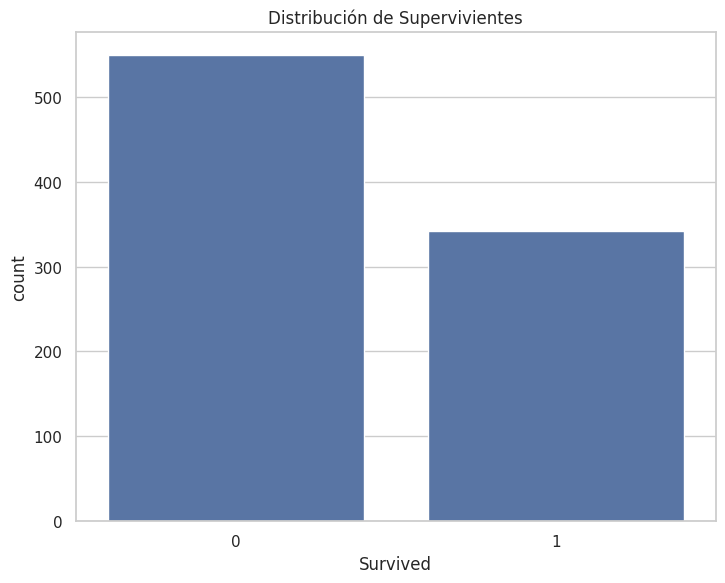

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Creación de gráficos para análisis exploratorio

# Distribución de supervivientes
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Survived', data=train_df)
plt.title('Distribución de Supervivientes')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


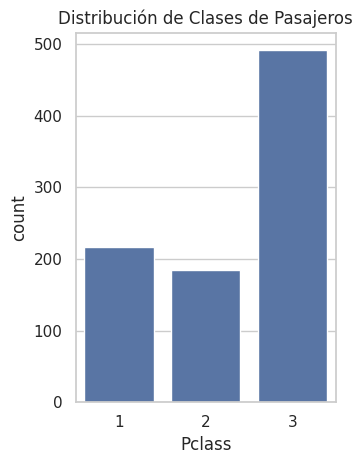

In [66]:
# Distribución de clases de pasajeros
plt.subplot(1, 2, 2)
sns.countplot(x='Pclass', data=train_df)
plt.title('Distribución de Clases de Pasajeros')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


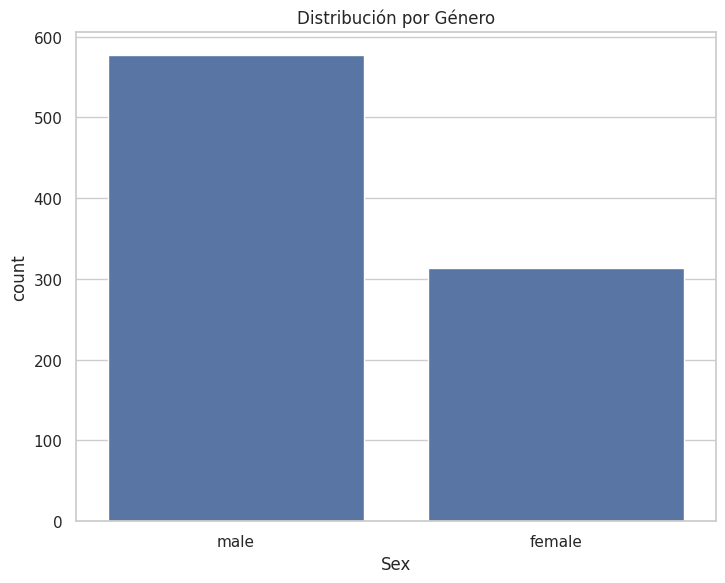

In [67]:
# Distribución por género
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Sex', data=train_df)
plt.title('Distribución por Género')

# Mostrar los gráficos
plt.tight_layout()
plt.show()



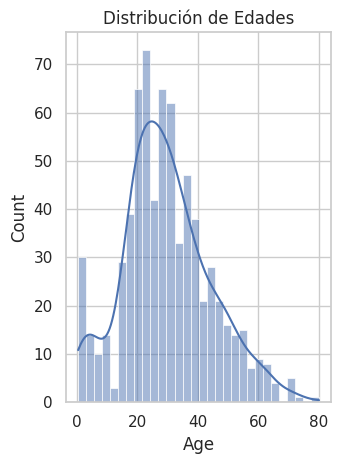

In [68]:
# Distribución de edades
plt.subplot(1, 2, 2)
sns.histplot(train_df['Age'].dropna(), kde=True, bins=30)
plt.title('Distribución de Edades')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


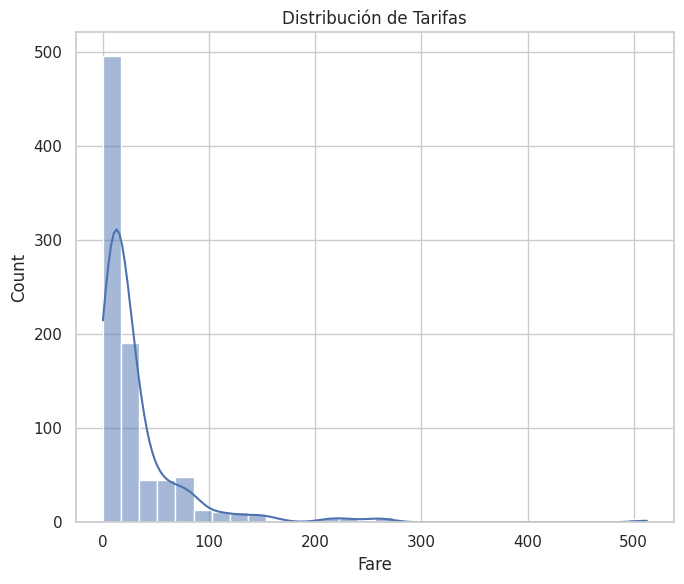

In [69]:
# Tarifas
plt.figure(figsize=(7, 6))
sns.histplot(train_df['Fare'], kde=True, bins=30)
plt.title('Distribución de Tarifas')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


#### Imputar valores faltantes
Vamos a analizar con mayor profundidad las edades. Vamos a encontrar una Distribución que se ajuste a este conjunto de datos. para ello, realizaremos pruebas de verosimilitud y de bondad de ajuste para encontrar los parametros de dichas distribuciones.

In [70]:
from scipy import stats
import numpy as np

# Eliminando valores NaN de la edad para el análisis
ages = train_df['Age'].dropna()

# Lista de distribuciones a probar
distributions = [stats.norm, stats.lognorm, stats.expon, stats.gamma]

# Preparando para almacenar los resultados
results = []

# Ajustando cada distribución a los datos
for distribution in distributions:
    # Ajustar la distribución a los datos
    params = distribution.fit(ages)

    # Calcular el logaritmo de la verosimilitud
    log_likelihood = np.sum(distribution.logpdf(ages, *params))
    
    # Almacenar los resultados
    results.append({
        'Distribution': distribution.name,
        'LL': log_likelihood,
        'Params': params
    })

# Convertir los resultados en un DataFrame para una mejor visualización
results_df = pd.DataFrame(results)
results_df.sort_values(by='LL', ascending=False, inplace=True)

results_df


,Distribution,LL,Params
3,gamma,-2914.244999,"(26.748229688039117, -45.37307548137508, 2.806..."
1,lognorm,-2914.248745,"(0.1302281010177486, -81.30746779734409, 110.0..."
0,norm,-2923.267472,"(29.69911764705882, 14.516321150817316)"
2,expon,-3125.088431,"(0.42, 29.27911764705882)"


LA distribución Gamma, dentro de las 4 que elegimos, es la que presenta mayor valor de logaritmo de la verosimilutud, casi identica a la log normal. Vamos a ver su gráfico:

In [71]:
# Extrayendo los parámetros del mejor ajuste (Gamma)
gamma_params = results_df.iloc[0]['Params']

# Creando una gama de edades para el gráfico
age_range = np.linspace(ages.min(), ages.max(), 100)

# Calculando los valores de PDF para la distribución Gamma
gamma_pdf = stats.gamma.pdf(age_range, *gamma_params)


## Creando el gráfico


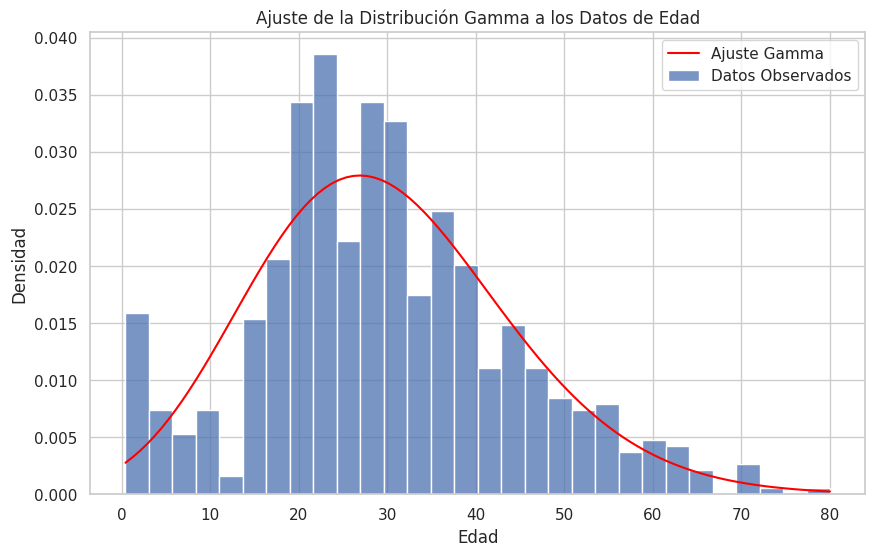

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(ages, kde=False, stat='density', bins=30, label='Datos Observados')
plt.plot(age_range, gamma_pdf, label='Ajuste Gamma', color='red')
plt.title('Ajuste de la Distribución Gamma a los Datos de Edad')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.show()

#### La prueba de Kolmogorov-Smirnov. 

La prueba de KS es una prueba no paramétrica que compara la distribución acumulada de dos conjuntos de datos, o una distribución de muestra con una distribución teórica. Un valor de p bajo indica que es probable que los datos observados no se hayan extraído de la distribución teórica.

**Hipotesis nula**: Los datos siguen una distribución Gamma.

In [73]:
# Realizando la prueba de Kolmogorov-Smirnov con la distribución Gamma ajustada
ks_statistic, ks_p_value = stats.kstest(ages, 'gamma', args=gamma_params)
ks_statistic, ks_p_value
print("La prueba de Kolmogorov-Smirnov para los datos de edad con la distribución Gamma ajustada dio como resultado un estadístico KS de aproximadamente "+str(ks_statistic)+" y un valor p de aproximadamente "+str(ks_p_value)+".")
print("El valor p es una medida de la significancia estadística. En este caso, un valor p de alrededor de "+str(ks_p_value)+" indica que hay una probabilidad del "+str(ks_p_value)+" de observar una diferencia tan grande o mayor entre la distribución de los datos y la distribución Gamma ajustada si los datos se hubieran extraído realmente de esta distribución. Generalmente, un valor p menor a 0.05 se considera estadísticamente significativo, lo que sugiere que podríamos rechazar la hipótesis nula de que los datos siguen la distribución Gamma ajustada.")


La prueba de Kolmogorov-Smirnov para los datos de edad con la distribución Gamma ajustada dio como resultado un estadístico KS de aproximadamente 0.057456239973735806 y un valor p de aproximadamente 0.01722614936676394.
El valor p es una medida de la significancia estadística. En este caso, un valor p de alrededor de 0.01722614936676394 indica que hay una probabilidad del 0.01722614936676394 de observar una diferencia tan grande o mayor entre la distribución de los datos y la distribución Gamma ajustada si los datos se hubieran extraído realmente de esta distribución. Generalmente, un valor p menor a 0.05 se considera estadísticamente significativo, lo que sugiere que podríamos rechazar la hipótesis nula de que los datos siguen la distribución Gamma ajustada.


En resumen, mientras que LL te dice qué tan bien se ajusta una distribución a los datos de manera relativa (comparada con otros modelos), la prueba KS te dice si hay evidencia estadística suficiente para afirmar que los datos se ajustan a una distribución específica. En este caso, aunque la distribución Gamma tenía un buen ajuste según LL (comparada con otras distribuciones), la prueba KS sugiere que hay diferencias significativas entre los datos y la distribución Gamma ajustada, lo que implica que la distribución Gamma puede no ser la representación más precisa de los datos de edad en este conjunto de datos.

#### "Mujeres y niños primero..."
Pareciera que poder imputar o completar las edad faltantes no sería posible. Pero, ¿Qué tal si consideramos otros factores? podríamos aprovechar que llegamos hasta este punto con ambas pruebas estadísticas y podemos buscar otros patrones interesantes.

En el histograma de edades, podemos ver como de entre los 0 y 15 años sube y baja la información, y posteriormente, como crea una segunda gráfica a aprtir de esa edad. Vamos considerar la decisión del Capitán y vamos a quitar a los niños de este analisis.

In [74]:
# Eliminando registros de pasajeros de 15 años o menos
titanic_data_adults = train_df[train_df['Age'] > 15]

# Verificando la eliminación
titanic_data_adults.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
# Extrayendo las edades ajustadas
ages_adults = titanic_data_adults['Age'].dropna()

# Ajustando cada distribución a los datos y calculando LL y KS para cada una
results_adults = []

for distribution in distributions:
    # Ajustar la distribución a los datos
    params = distribution.fit(ages_adults)

    # Calcular el logaritmo de la verosimilitud
    log_likelihood = np.sum(distribution.logpdf(ages_adults, *params))
    
    # Realizando la prueba KS
    ks_statistic, ks_p_value = stats.kstest(ages_adults, distribution.name, args=params)

    # Almacenar los resultados
    results_adults.append({
        'Distribution': distribution.name,
        'LL': log_likelihood,
        'KS Statistic': ks_statistic,
        'p-value': ks_p_value,
        'Params': params
    })

# Convertir los resultados en un DataFrame
results_adults_df = pd.DataFrame(results_adults)
results_adults_df.sort_values(by='LL', ascending=False, inplace=True)

results_adults_df



,Distribution,LL,KS Statistic,p-value,Params
3,gamma,-2392.413023,0.048599,9.821533e-02,"(1.653266207436157, 15.355037154955486, 10.532..."
1,lognorm,-2407.753460,0.045445,1.431046e-01,"(0.5605018317003773, 9.983263899270048, 19.604..."
2,expon,-2410.080586,0.119517,2.600457e-08,"(16.0, 16.76782884310618)"
0,norm,-2485.585612,0.104739,1.759475e-06,"(32.76782884310618, 12.430869818566244)"



- Las distribuciones Gamma y Log-Normal tienen los valores más altos de LL y los p-values más altos en la prueba KS, sugiriendo un mejor ajuste comparado con las distribuciones Exponencial y Normal.
- Las distribuciones Exponencial y Normal tienen p-values de la prueba KS extremadamente bajos, indicando que no se ajustan bien a los datos.

Interesantemente, el p-value para la distribución Gamma es ahora mayor que 0.05, sugiriendo que no hay evidencia suficiente para rechazar la hipótesis nula de que los datos siguen esta distribución. Esto es un cambio significativo respecto a los datos que incluían a niños menores de 15 años.

#### Un paso más siempre...

Vamos ahora a screar dos grupos, mujeres mayores de 15 años y hombres mayores a 15 años. Veamos como se comportaban sus edades.

In [76]:
# Creando dos grupos: Mujeres mayores a 15 años y Hombres mayores a 15 años
women_over_15 = titanic_data_adults[(titanic_data_adults['Sex'] == 'female') & (titanic_data_adults['Age'] > 15)]
men_over_15 = titanic_data_adults[(titanic_data_adults['Sex'] == 'male') & (titanic_data_adults['Age'] > 15)]

# Función para realizar LL y KS para las 4 distribuciones en un grupo dado
def analyze_distributions(data):
    ages = data['Age'].dropna()
    results = []
    for distribution in distributions:
        # Ajustar la distribución a los datos
        params = distribution.fit(ages)
        # Calcular el logaritmo de la verosimilitud
        log_likelihood = np.sum(distribution.logpdf(ages, *params))
        # Realizar la prueba KS
        ks_statistic, ks_p_value = stats.kstest(ages, distribution.name, args=params)
        # Almacenar los resultados
        results.append({
            'Distribution': distribution.name,
            'LL': log_likelihood,
            'KS Statistic': ks_statistic,
            'p-value': ks_p_value,
            'Params': params
        })
    return pd.DataFrame(results)

# Análisis para Mujeres mayores a 15 años
results_women = analyze_distributions(women_over_15)

# Análisis para Hombres mayores a 15 años
results_men = analyze_distributions(men_over_15)

results_women.sort_values(by='LL', ascending=False, inplace=True)
results_men.sort_values(by='LL', ascending=False, inplace=True)

results_women, results_men



(  Distribution          LL  KS Statistic   p-value  \
 3        gamma -816.642943      0.062903  0.340054   
 2        expon -822.424341      0.127414  0.001520   
 1      lognorm -822.622199      0.058165  0.435650   
 0         norm -841.172662      0.098960  0.026049   
 
                                               Params  
 3  (1.6799609197927816, 15.296509144608983, 9.942...  
 2                                       (16.0, 16.0)  
 1  (0.5049049334987032, 8.426235099904057, 20.862...  
 0                         (32.0, 11.469044895966189)  ,
   Distribution           LL  KS Statistic   p-value  \
 3        gamma -1575.220612      0.043805  0.395038   
 1      lognorm -1584.439041      0.045669  0.344685   
 2        expon -1587.301722      0.115736  0.000028   
 0         norm -1641.877000      0.110104  0.000081   
 
                                               Params  
 3  (1.6499892791926127, 15.37004669928988, 10.789...  
 1  (0.5825488855633697, 10.523713819025879, 19.

##### Mujeres Mayores de 15 Años

1. **Distribución Gamma**
   - LL: -816.64
   - KS Statistic: 0.063
   - p-value: 0.340

2. **Distribución Log-Normal**
   - LL: -822.62
   - KS Statistic: 0.058
   - p-value: 0.436

3. **Distribución Exponencial**
   - LL: -822.42
   - KS Statistic: 0.127
   - p-value: 0.0015

4. **Distribución Normal**
   - LL: -841.17
   - KS Statistic: 0.099
   - p-value: 0.026

##### Hombres Mayores de 15 Años

1. **Distribución Gamma**
   - LL: -1575.22
   - KS Statistic: 0.044
   - p-value: 0.395

2. **Distribución Log-Normal**
   - LL: -1584.44
   - KS Statistic: 0.046
   - p-value: 0.345

3. **Distribución Exponencial**
   - LL: -1587.30
   - KS Statistic: 0.116
   - p-value: 0.00003

4. **Distribución Normal**
   - LL: -1641.88
   - KS Statistic: 0.110
   - p-value: 0.00008

Para ambos grupos:

- Las distribuciones **Gamma** y **Log-Normal** muestran los valores más altos de LL y p-values más altos en la prueba KS, sugiriendo un mejor ajuste en comparación con las distribuciones Exponencial y Normal.

- Los p-values de las distribuciones Gamma y Log-Normal para ambos grupos son mayores de 0.05, lo que indica que no hay suficiente evidencia para rechazar la hipótesis nula de que los datos siguen estas distribuciones.

- Las distribuciones **Exponencial** y **Normal** tienen p-values muy bajos en la prueba KS, sugiriendo que no se ajustan bien a los datos.

Estos resultados indican que, después de dividir el conjunto de datos por género y edad, las distribuciones Gamma y Log-Normal proporcionan un mejor ajuste a los datos en comparación con las distribuciones Exponencial y Normal.


Vamos a dejar hasta aquí la exploración y comencemos con la generación de un modelo que pueda hacer predicciones sobre la supervivencia. 

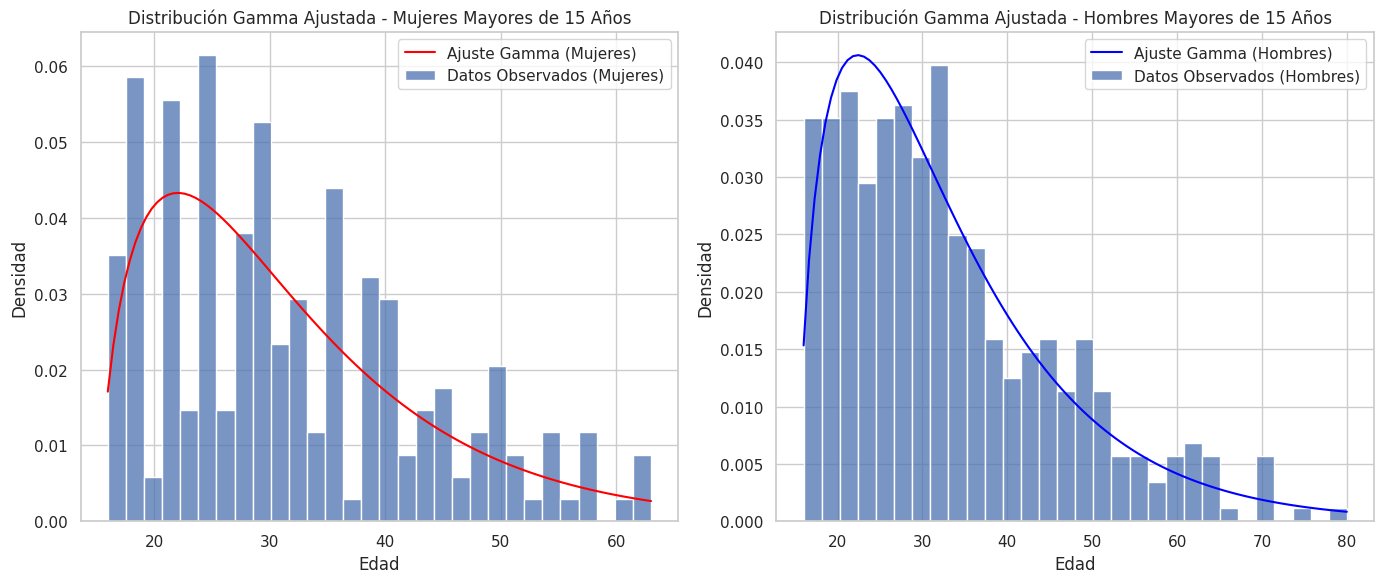

In [77]:
# Extrayendo los parámetros de la distribución Gamma para mujeres y hombres
gamma_params_women = results_women.iloc[0]['Params']
gamma_params_men = results_men.iloc[0]['Params']

# Creando rangos de edades para el gráfico
age_range_women = np.linspace(women_over_15['Age'].min(), women_over_15['Age'].max(), 100)
age_range_men = np.linspace(men_over_15['Age'].min(), men_over_15['Age'].max(), 100)

# Calculando los valores de PDF para la distribución Gamma
gamma_pdf_women = stats.gamma.pdf(age_range_women, *gamma_params_women)
gamma_pdf_men = stats.gamma.pdf(age_range_men, *gamma_params_men)

# Creando los gráficos
plt.figure(figsize=(14, 6))

# Gráfico para mujeres
plt.subplot(1, 2, 1)
sns.histplot(women_over_15['Age'], kde=False, stat='density', bins=30, label='Datos Observados (Mujeres)')
plt.plot(age_range_women, gamma_pdf_women, label='Ajuste Gamma (Mujeres)', color='red')
plt.title('Distribución Gamma Ajustada - Mujeres Mayores de 15 Años')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()

# Gráfico para hombres
plt.subplot(1, 2, 2)
sns.histplot(men_over_15['Age'], kde=False, stat='density', bins=30, label='Datos Observados (Hombres)')
plt.plot(age_range_men, gamma_pdf_men, label='Ajuste Gamma (Hombres)', color='blue')
plt.title('Distribución Gamma Ajustada - Hombres Mayores de 15 Años')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()

plt.tight_layout()
plt.show()


### Analisis de correlación

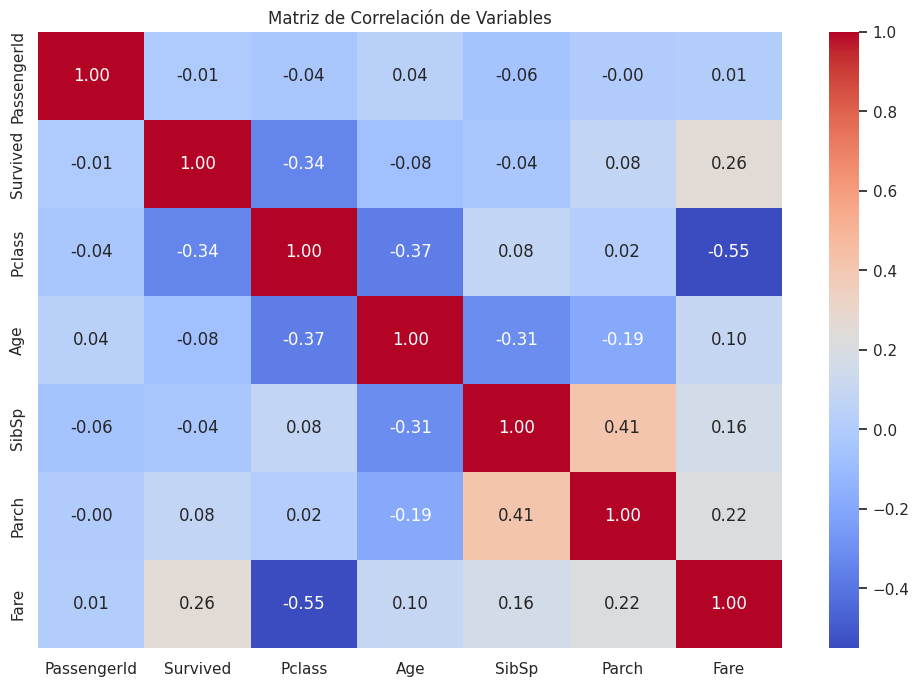

In [78]:
# Análisis de correlaciones
train_df_cor=train_df.copy()
train_df_cor.pop("Name")
train_df_cor.pop("Ticket")
train_df_cor.pop("Cabin")
train_df_cor.pop("Embarked")
train_df_cor.pop("Sex")

# Calcular la matriz de correlación
correlation_matrix = train_df_cor.corr()

# Crear un gráfico de calor para visualizar las correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables')
plt.show()


## Análisis de Datos, Creación de un modelo random forest

Con los resultados anteriores, notando como la edad y género afecta la supervivencia, vamos a generar varios modelos. Uno general, y otros dos para los grupos de mujeres y hombres mayores a 15 años.

In [79]:
# Cargar los archivos de nuevo para evitar alguna perdida.
train_data_path = 'datos/train.csv'
test_data_path = 'datos/test.csv'
gender_submission_path = 'datos/gender_submission.csv'

# Leer los datos
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)
gender_submission_df = pd.read_csv(gender_submission_path)


#### General

El siguiente paso es preparar los datos para el modelo de Random Forest. Esto incluye:

-Limpieza de datos: Manejar valores faltantes y convertir características categóricas en numéricas.
Selección de características: Decidir qué columnas usar para el entrenamiento.
Entrenamiento del modelo: Usar el conjunto de entrenamiento para entrenar un modelo de Random Forest.

-Predicción: Usar el modelo entrenado para hacer predicciones sobre el conjunto de prueba.
Voy a proceder con la limpieza y preparación de los datos.




## Limpieza e imputación de datos

Vamos a usar la libreria de Sk learn, 

para el imputado de datos, usaremos el modo simple, y su metodo por default que es promedio.

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import numpy as np

# Función para preparar los datos
def prepare_data(df):
    # Convertir características categóricas en numéricas
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}).astype(int)

    # Tratar valores faltantes para 'Age' y 'Fare'
    imputer = SimpleImputer(strategy='median')
    df['Age'] = imputer.fit_transform(df[['Age']])
    df['Fare'] = imputer.fit_transform(df[['Fare']])

    # Seleccionar características relevantes
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
    X = df[features]
    return X


Los datos han sido preparados correctamente para el modelo. Las características seleccionadas son 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch' y 'Fare', con valores faltantes tratados y características categóricas convertidas en numéricas.

Aquí están las primeras filas del archivo de envío, que muestra el 'PassengerId' y la predicción de supervivencia correspondiente ('Survived').

In [81]:
# Preparar datos de entrenamiento y prueba
X_train = prepare_data(train_df)
y_train = train_df['Survived']
X_test = prepare_data(test_df)

# Verificar los primeros registros de X_train y X_test para asegurar que la preparación fue correcta
X_train_head = X_train.head()
X_test_head = X_test.head()

X_train_head
X_test_head


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875


In [82]:
# Crear y entrenar el modelo de Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
predictions = random_forest_model.predict(X_test)

# Crear un DataFrame para el envío con PassengerId y las predicciones realizadas
submission_df = test_df[['PassengerId']].copy()
submission_df['Survived'] = predictions

submission_df.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


In [83]:
# Dividir el conjunto de entrenamiento en subconjuntos de entrenamiento y prueba para la evaluación del modelo
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Entrenar el modelo en el subconjunto de entrenamiento
random_forest_model_split = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model_split.fit(X_train_split, y_train_split)

# Realizar predicciones en el subconjunto de prueba
predictions_val = random_forest_model_split.predict(X_val_split)

# Calcular la precisión
accuracy = accuracy_score(y_val_split, predictions_val)
accuracy


0.8044692737430168

In [84]:
## Grid Search
#vamos a analizar la mejor profundidad de los arboles para tomar desiciones.

In [85]:
# Importar librerías necesarias
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Función para preparar los datos
def prepare_data(df):
    # Convertir características categóricas en numéricas
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}).astype(int)

    # Tratar valores faltantes para 'Age' y 'Fare'
    imputer = SimpleImputer(strategy='median')
    df['Age'] = imputer.fit_transform(df[['Age']])
    df['Fare'] = imputer.fit_transform(df[['Fare']])

    # Seleccionar características relevantes
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
    X = df[features]
    return X

# Cargar los datos
data = pd.read_csv('datos/train.csv')

# Preparar características y etiquetas
X = prepare_data(data)
y = data['Survived']

# Dividir los datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurar modelo base
rf_model = RandomForestClassifier(random_state=42)

# Definir el espacio de búsqueda para Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # Validación cruzada con 5 particiones
    scoring='accuracy',  # Métrica de evaluación
    verbose=2,  # Imprimir progreso
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Ejecutar Grid Search
print("Ejecutando Grid Search...")
grid_search.fit(X_train, y_train)

# Resultados del Grid Search
print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("\nMejor precisión en validación cruzada:")
print(grid_search.best_score_)

# Evaluar el modelo con el conjunto de validación
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)

print("\nMétricas en conjunto de validación:")
print(classification_report(y_val, y_pred))
print(f"Precisión en validación: {accuracy_score(y_val, y_pred):.4f}")


Ejecutando Grid Search...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Mejores hiperparámetros encontrados:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

Mejor precisión en validación cruzada:
0.8384516891559144

Métricas en conjunto de validación:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.70      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179

Precisión en validación: 0.8268


In [86]:
import json

# Exportar hiperparámetros óptimos a un archivo JSON
best_params = grid_search.best_params_
with open("best_hyperparameters.json", "w") as f:
    json.dump(best_params, f)

print("Hiperparámetros exportados correctamente a 'best_hyperparameters.json'")


Hiperparámetros exportados correctamente a 'best_hyperparameters.json'


In [87]:
# Cargar hiperparámetros desde un archivo JSON
with open("best_hyperparameters.json", "r") as f:
    loaded_params = json.load(f)

print("Hiperparámetros cargados:", loaded_params)

# Crear un modelo con los hiperparámetros cargados
model = RandomForestClassifier(random_state=42, **loaded_params)

# Entrenar el modelo con los datos
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

# Evaluar el modelo
print("Precisión en validación:", accuracy_score(y_val, y_pred))


Hiperparámetros cargados: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Precisión en validación: 0.8268156424581006


In [88]:
import pandas as pd
import json
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Función para preparar los datos (misma lógica que antes)
def prepare_data(df):
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}).astype(int)
    imputer = SimpleImputer(strategy='median')
    df['Age'] = imputer.fit_transform(df[['Age']])
    df['Fare'] = imputer.fit_transform(df[['Fare']])
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
    X = df[features]
    return X

# Cargar datos de entrenamiento y prueba
train_data = pd.read_csv("datos/train.csv")
test_data = pd.read_csv("datos/test.csv")

# Preparar datos de entrenamiento
X_train = prepare_data(train_data)
y_train = train_data['Survived']

# Preparar datos de prueba
X_test = prepare_data(test_data)

# Cargar los mejores hiperparámetros
with open("best_hyperparameters.json", "r") as f:
    best_params = json.load(f)

# Entrenar modelo con los mejores hiperparámetros
model = RandomForestClassifier(random_state=42, **best_params)
model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
predictions = model.predict(X_test)

# Crear el archivo para Kaggle
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": predictions
})
submission.to_csv("submission.csv", index=False)

print("Predicciones guardadas en 'submission.csv'. ¡Listo para subir a Kaggle!")


Predicciones guardadas en 'submission.csv'. ¡Listo para subir a Kaggle!


In [89]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Configurar Kaggle API
api = KaggleApi()
api.authenticate()

# Nombre de la competencia
competition_name = "titanic"

# Ruta al archivo de envío
submission_file = "submission.csv"

# Mensaje opcional para describir el envío
message = "Envío automático desde código"

# Enviar archivo a Kaggle
print(f"Enviando '{submission_file}' a la competencia '{competition_name}'...")
api.competition_submit(submission_file, message, competition_name)
print("¡Envío realizado con éxito!")


Enviando 'submission.csv' a la competencia 'titanic'...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2.77k/2.77k [00:00<00:00, 6.49kB/s]


¡Envío realizado con éxito!


In [90]:
from kaggle.api.kaggle_api_extended import KaggleApi

# Configurar Kaggle API
api = KaggleApi()
api.authenticate()

# Nombre de la competencia
competition_name = "titanic"

# Obtener lista de envíos
submissions = api.competition_submissions(competition_name)

print(f"Envíos realizados para la competencia '{competition_name}':")
for submission in submissions:
    print(f"- Envío ID: {submission.ref}, Estado: {submission.status}, Puntuación: {submission.publicScore}")


Envíos realizados para la competencia 'titanic':
- Envío ID: 41287493, Estado: pending, Puntuación: 
- Envío ID: 41287107, Estado: complete, Puntuación: 0.77033
- Envío ID: 41286847, Estado: complete, Puntuación: 0.77033


In [91]:
import mlflow
import mlflow.sklearn
import json
from sklearn.metrics import accuracy_score

# Cargar los mejores hiperparámetros
with open("best_hyperparameters.json", "r") as f:
    best_params = json.load(f)

# Entrenar modelo con los mejores hiperparámetros
model = RandomForestClassifier(random_state=42, **best_params)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

# Configurar MLflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")  # Cambiar si usas un servidor remoto
mlflow.set_experiment("Titanic_Competition")

# Registrar experimento
with mlflow.start_run():
    # Registrar hiperparámetros
    mlflow.log_params(best_params)

    # Registrar métricas
    mlflow.log_metric("accuracy", accuracy)

    # Registrar el modelo
    mlflow.sklearn.log_model(model, "random_forest_model")

    # Guardar el archivo de predicciones como artefacto
    submission.to_csv("submission.csv", index=False)
    mlflow.log_artifact("submission.csv")

    print("Resultados registrados en MLflow")


2024/11/24 05:06:08 INFO mlflow.tracking.fluent: Experiment with name 'Titanic_Competition' does not exist. Creating a new experiment.
2024/11/24 05:06:08 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    ex

🏃 View run honorable-grub-523 at: http://127.0.0.1:5000/#/experiments/849426485236852579/runs/a1cff08561b947bda37897aad76108b8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/849426485236852579


AttributeError: 'Submission' object has no attribute 'to_csv'

[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  